In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Bakery.csv')

In [9]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18887 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  18887 non-null  int64 
 1   Items          18887 non-null  object
 2   DateTime       18887 non-null  object
 3   Daypart        18887 non-null  object
 4   DayType        18887 non-null  object
dtypes: int64(1), object(4)
memory usage: 885.3+ KB


In [11]:
df.describe()

,TransactionNo
count,18887.000000
mean,4951.051517
std,2811.619306
min,1.000000
25%,2496.500000
50%,5082.000000
75%,7378.500000
max,9684.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
item_count = df['Items'].value_counts().reset_index()
print(item_count)

             index  Items
0           Coffee   4528
1            Bread   3097
2              Tea   1350
3             Cake    983
4           Pastry    815
..             ...    ...
89           Bacon      1
90    Gift voucher      1
91  Olum & polenta      1
92        Raw bars      1
93         Polenta      1

[94 rows x 2 columns]


In [16]:
rename_column = item_count.rename(columns = {'index':'item_list','Items':'Frequency'})
print(rename_column)

         item_list  Frequency
0           Coffee       4528
1            Bread       3097
2              Tea       1350
3             Cake        983
4           Pastry        815
..             ...        ...
89           Bacon          1
90    Gift voucher          1
91  Olum & polenta          1
92        Raw bars          1
93         Polenta          1

[94 rows x 2 columns]


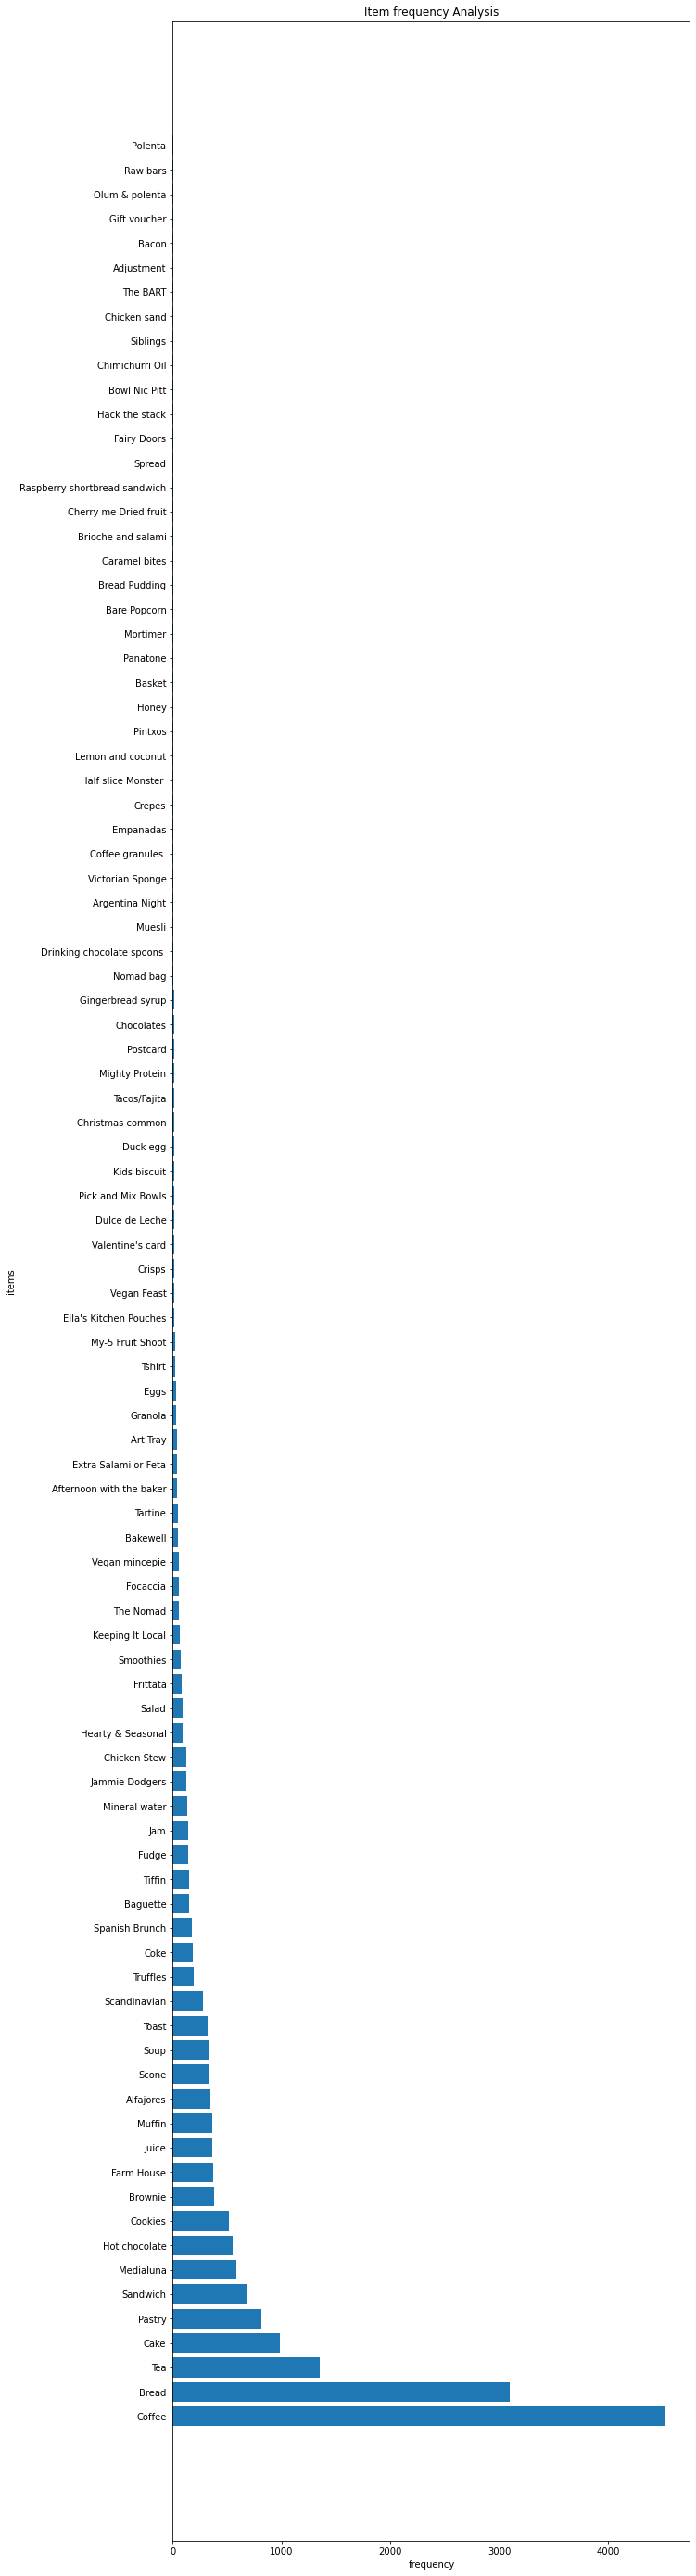

In [25]:
items = rename_column['item_list']
frequency = rename_column['Frequency']

fig, ax = plt.subplots(figsize = (10,50))
ax.barh(items,frequency)

ax.set_title('Item frequency Analysis')
ax.set_xlabel('frequency')
ax.set_ylabel('items')

plt.show()



In [18]:
daypart_frequency = df['Daypart'].value_counts().reset_index()
print(daypart_frequency)

       index  Daypart
0  Afternoon    10687
1    Morning     7697
2    Evening      490
3      Night       13


In [19]:
rename_daypart = daypart_frequency.rename(columns = {'index':'Daypart','Daypart':'No of transaction'})
print(rename_daypart)

     Daypart  No of transaction
0  Afternoon              10687
1    Morning               7697
2    Evening                490
3      Night                 13


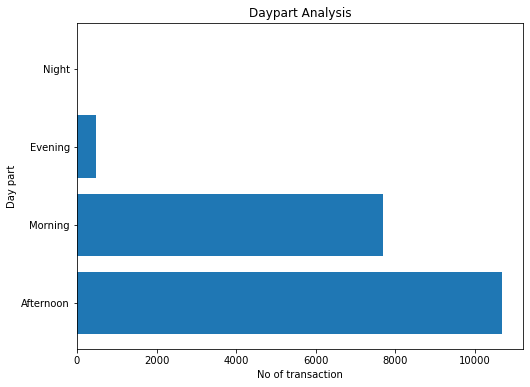

In [20]:
day_part = rename_daypart['Daypart']
count = rename_daypart['No of transaction']

fig, ax = plt.subplots(figsize = (8,6))
ax.barh(day_part,count)

ax.set_title('Daypart Analysis')
ax.set_xlabel('No of transaction')
ax.set_ylabel('Day part')

plt.show()

In [21]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
    
df['Date'] = df['DateTime'].dt.date

df['Time'] = df['DateTime'].dt.time
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06


In [27]:
start_date = '2016-10-30'
end_date = '2017-09-04'

filtered_df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

#transaction_count = filtered_df.shape[0]
transaction_count = len(filtered_df)

print('Total number of transaction:',transaction_count)

Total number of transaction: 15064


In [26]:
import datetime

start_date = datetime.datetime.strptime('2016-10-30 09:58:11','%Y-%m-%d %H:%M:%S')
end_date = datetime.datetime.strptime('2017-09-04 15:04:24','%Y-%m-%d %H:%M:%S')

filtered_df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]
transaction_count = len(filtered_df)

print('Total number of transactions:',transaction_count)

Total number of transactions: 15131


In [28]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df = df.sort_values('Date')

df['CumulativeCount'] = df['TransactionNo'].cumsum()

df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,CumulativeCount
401,195,Scandinavian,2016-01-11 11:06:09,Morning,Weekday,2016-01-11,11:06:09,195
437,214,Bread,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,409
438,214,Tea,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,623
440,215,Pastry,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,838
441,215,Coffee,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,1053
...,...,...,...,...,...,...,...,...
16894,8016,Pastry,2017-12-03 12:32:01,Afternoon,Weekend,2017-12-03,12:32:01,93478404
16895,8017,Baguette,2017-12-03 12:33:04,Afternoon,Weekend,2017-12-03,12:33:04,93486421
16896,8018,Cookies,2017-12-03 12:34:03,Afternoon,Weekend,2017-12-03,12:34:03,93494439
16890,8015,Scone,2017-12-03 12:21:11,Afternoon,Weekend,2017-12-03,12:21:11,93502454


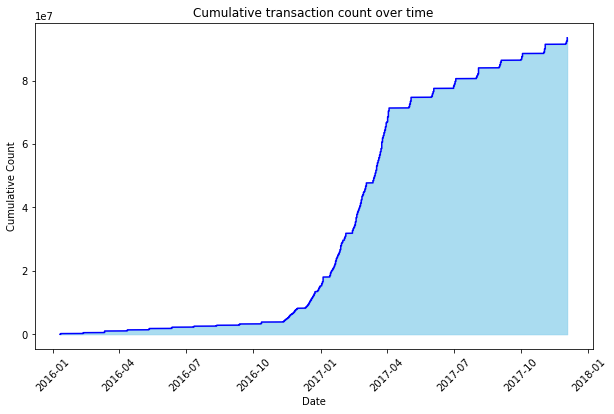

In [34]:
fig, ax = plt.subplots(figsize = (10,6))

ax.fill_between(df['Date'],df['CumulativeCount'],color = 'skyblue',alpha=0.7)
ax.plot(df['Date'],df['CumulativeCount'],color='blue')

ax.set_title('Cumulative transaction count over time')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Count')

plt.xticks(rotation=45)

plt.show()

In [35]:
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time,CumulativeCount
401,195,Scandinavian,2016-01-11 11:06:09,Morning,Weekday,2016-01-11,11:06:09,195
437,214,Bread,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,409
438,214,Tea,2016-01-11 12:26:43,Afternoon,Weekday,2016-01-11,12:26:43,623
440,215,Pastry,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,838
441,215,Coffee,2016-01-11 12:30:30,Afternoon,Weekday,2016-01-11,12:30:30,1053
...,...,...,...,...,...,...,...,...
16894,8016,Pastry,2017-12-03 12:32:01,Afternoon,Weekend,2017-12-03,12:32:01,93478404
16895,8017,Baguette,2017-12-03 12:33:04,Afternoon,Weekend,2017-12-03,12:33:04,93486421
16896,8018,Cookies,2017-12-03 12:34:03,Afternoon,Weekend,2017-12-03,12:34:03,93494439
16890,8015,Scone,2017-12-03 12:21:11,Afternoon,Weekend,2017-12-03,12:21:11,93502454


In [36]:
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

monthly_sales = df.groupby(['Year','Month'])['TransactionNo'].sum().reset_index()

print(monthly_sales)

    Year  Month  TransactionNo
0   2016      1         221247
1   2016      2         291583
2   2016      3         523297
3   2016      4         357475
4   2016      5         429128
5   2016      6         417158
6   2016      7         315789
7   2016      8         295622
8   2016      9         404075
9   2016     10         634189
10  2016     11        4324977
11  2016     12        7040519
12  2017      1       14396021
13  2017      2       15093175
14  2017      3       21960213
15  2017      4        4658238
16  2017      5        3369035
17  2017      6        2817136
18  2017      7        3075342
19  2017      8        3389547
20  2017      9        2408912
21  2017     10        2132901
22  2017     11        2901579
23  2017     12        2053352


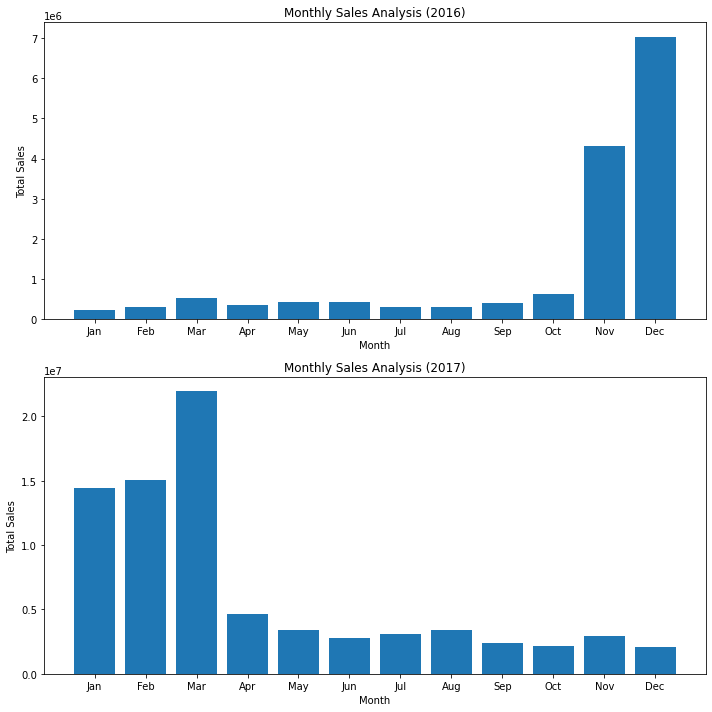

In [40]:
sales_2016 = monthly_sales[monthly_sales['Year'] == 2016]
sales_2017 = monthly_sales[monthly_sales['Year'] == 2017]

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

ax1.bar(sales_2016['Month'],sales_2016['TransactionNo'])
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.set_title('Monthly Sales Analysis (2016)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales')

ax2.bar(sales_2017['Month'],sales_2017['TransactionNo'])
ax2.set_xticks(range(1,13))
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.set_title('Monthly Sales Analysis (2017)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

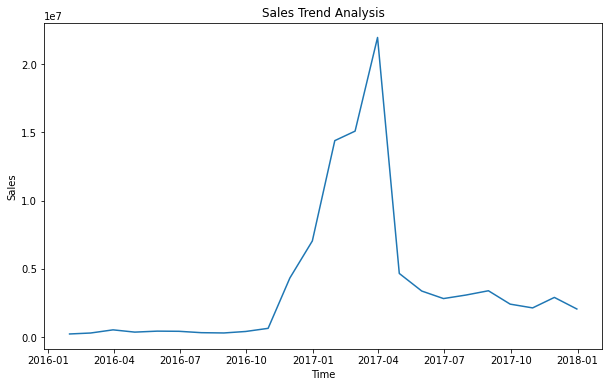

In [42]:
sales_data = df[['DateTime','TransactionNo']]

sales_data.set_index('DateTime',inplace=True)

monthly_sales = sales_data.resample('M').sum()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index,monthly_sales['TransactionNo'])
plt.title('Sales Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Sales')

plt.show()